In [1]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read in Files
DF1=pd.read_excel('C:/Users/longh/Downloads/2019 Winter Data Science Intern Challenge Data Set.xlsx')


In [3]:
#overview
DF1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1863,39,738,536,4,cash,2017-03-01 00:08:09.179
1,1742,39,910,268,2,cash,2017-03-01 00:10:19.043
2,3229,97,912,324,2,cash,2017-03-01 00:14:12.250
3,1268,80,798,290,2,credit_card,2017-03-01 00:19:31.258
4,2690,49,799,258,2,credit_card,2017-03-01 00:22:24.790
...,...,...,...,...,...,...,...
4995,2631,53,940,112,1,credit_card,2017-03-30 23:12:13.085
4996,1686,34,818,244,2,cash,2017-03-30 23:16:09.573
4997,1475,21,815,142,1,cash,2017-03-30 23:26:54.436
4998,318,52,848,292,2,cash,2017-03-30 23:41:34.347


In [4]:
DF1['created_at']=pd.to_datetime(DF1['created_at'])
DF1['Day']=pd.DatetimeIndex(DF1['created_at']).day


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='order_amount'>

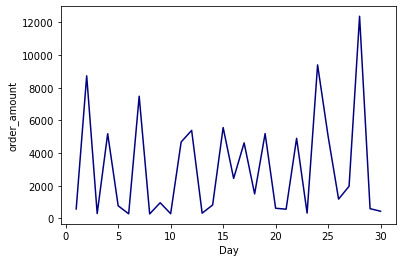

In [5]:
# Plot the avg of order amount by Day.
DFavgorderamount=DF1.groupby('Day').agg({'order_amount':'mean'}).reset_index()
sns.lineplot(DFavgorderamount['Day'],DFavgorderamount['order_amount'],color='navy')
#------------------------------

- We can see a very high number of order amount per day. More than 2000 on average per day per customer( because when aggregrating, the average stands for on average for a row, or a customer)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='total_items'>

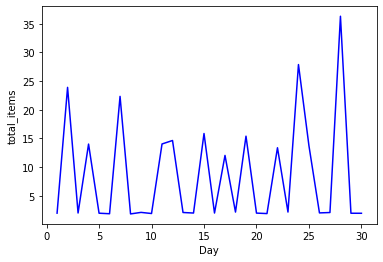

In [6]:
DFavgitem=DF1.groupby('Day').agg({'total_items':'mean'}).reset_index()
sns.lineplot(DFavgitem['Day'],DFavgitem['total_items'],color='blue')

- However, we can see that on average for an order, there are more than just 1 item per orders. Some days, there are on average somewhat 25 items.

In [7]:
DF1['order_amount'].mean()

3145.128

In [8]:
DF1['order_amount'].median()

284.0

- AOV as calculated is $3145.13 and MOV is 284

In [9]:
DF1[DF1['total_items']<2]['order_amount'].mean()

417.36448087431694

In [10]:
DF1[DF1['total_items']<2]['order_amount'].median()

153.0

- However, if we only care about orders with just 1 items, the AOV would be $417.36, totally acceptable than previous calculation. If cared about median, then MOV = 153.00

### There are some customers buying more than one item in an order, so the order_amount does not represent the average price of a sneaker. Therefore, we need to calculate the average item amount per order ###

In [11]:
# calculate the amount of dollar value per item in an order with a customer
DF1['itemamount']=DF1['order_amount']/DF1['total_items']

In [12]:
DF1['itemamount'].mean()

387.7428

- Average item amount would then be $387.74

In [13]:
DF1['itemamount'].std()

2441.963725368457

- However, STD is high at $2441,96 showing that there are high variations in the types of shoes and the average price of a shoe that a customer pays on average

In [14]:
DF1['itemamount'].median()

153.0

- Median a more representative in this case because of large deviations in item amount

In [15]:
# Day to day statistics
DF1.groupby('Day').agg({'itemamount':['mean','median','std','max'],'order_amount':['sum','std'],'total_items':['sum','std'],'user_id':['nunique','count']}).reset_index()

Day   itemamount                              order_amount                \
               mean median          std      max          sum           std   
0    1   294.532967  154.0  1895.742364  25725.0       106154   3794.599679   
1    2   573.500000  153.0  3265.230642  25725.0      1588109  73707.995273   
2    3   149.086420  148.0    28.807650    352.0        48729    164.773594   
3    4   312.309091  156.0  1990.758587  25725.0       855504  55314.401752   
4    5   311.539877  156.0  2003.004161  25725.0       126293   6023.052526   
5    6   151.567568  153.0    24.927968    201.0        42266    154.366690   
6    7   156.086735  156.0    34.702658    352.0      1465850  70902.301804   
7    8   149.865385  153.5    23.221538    201.0        43432    148.375325   
8    9   409.110553  153.0  2557.423504  25725.0       191287   6530.472408   
9   10   151.131737  154.0    29.966156    352.0        48908    193.714232   
10  11   307.239521  153.0  1979.057684  25725.0       781305  54476.836335   
11  12   637.937107  153.0  3490.203742  25725.0       856797  55971.927059   
12  13   152.748428  153.0    32.024707    352.0        51362    203.837128   
13  14   498.614865  153.0  2962.696247  25725.0       122336   4684.367597   
14  15   510.027972  153.0  3013.759105  25725.0       795442  58894.085918   
15  16  1047.580420  156.0  4713.865075  25725.0       350442  11966.591888   
16  17   798.590909  155.0  4022.345641  25725.0       915709  50212.633680   
17  18   740.942197  153.0  3854.937807  25725.0       259864   8191.970453   
18  19   324.436242  153.0  2095.225390  25725.0       773732  57673.115536   
19  20   313.550633  156.0  2034.626007  25725.0        98665   4072.073020   
20  21   292.569832  156.0  1911.762355  25725.0       101563   3827.271498   
21  22   444.897143  153.0  2726.117479  25725.0       857995  53500.808834   
22  23   151.677632  153.0    27.451004    352.0        50003    168.799047   
23  24   155.129032  144.0    51.757641    352.0      1456430  79673.287827   
24  25   456.123529  155.0  2765.369918  25725.0       857247  54280.120938   
25  26   737.468571  156.0  3832.757784  25725.0       207534   6061.435372   
26  27   601.505882  153.0  3377.356459  25725.0       334819  13714.907711   
27  28   153.588571  153.0    35.704919    352.0      2165019  91603.954876   
28  29   303.012121  148.0  1991.311212  25725.0        98929   3985.386068   
29  30   301.850299  147.0  1979.286916  25725.0        73915   1973.164347   

   total_items             user_id        
           sum         std nunique count  
0          359    0.971593     131   182  
1         4351  208.875408     135   182  
2          324    0.958778     134   162  
3         2313  155.554338     124   165  
4          320    0.922219     126   163  
5          277    0.942427     121   148  
6         4378  201.318141     148   196  
7          287    0.876185     119   156  
8          419    0.986740     146   199  
9          319    0.992905     126   167  
10        2344  154.607739     125   167  
11        2328  158.449340     127   159  
12         332    1.104557     126   159  
13         295    0.943986     120   148  
14        2268  167.092898     117   143  
15         285    1.010484     116   143  
16        2384  141.998815     152   198  
17         374    1.010032     123   173  
18        2294  163.686080     117   149  
19         313    0.954183     125   158  
20         340    0.977816     125   179  
21        2341  151.040664     133   175  
22         329    1.038619     123   152  
23        4322  226.209705     122   155  
24        2330  153.246085     132   170  
25         353    1.008437     138   175  
26         354    1.106321     135   170  
27        6354  260.086075     127   175  
28         323    0.919647     131   165  
29         326    0.910504     126   167

- The median does not change much over the 30 days in the month
- The mean is heavily affected by the standard devation on days where there are products with high prices on sold( especially at $25,725).

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


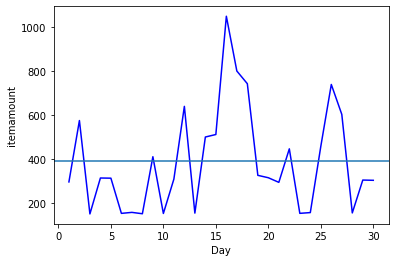

In [16]:
# Average mean item amount on each day.
DFavgitemamount=DF1.groupby('Day').agg({'itemamount':'mean'}).reset_index()
graph=sns.lineplot(DFavgitemamount['Day'],DFavgitemamount['itemamount'],color='blue')
graph.axhline(DF1['itemamount'].mean())
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


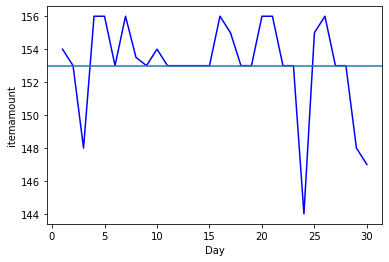

In [17]:
#  median item amount on each day.
DFavgitemamount=DF1.groupby('Day').agg({'itemamount':'median'}).reset_index()
graph=sns.lineplot(DFavgitemamount['Day'],DFavgitemamount['itemamount'],color='blue')
graph.axhline(DF1['itemamount'].median())
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


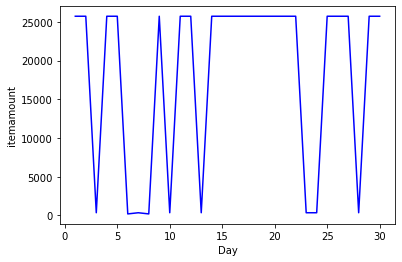

In [18]:
#  max item amount on each day.
DFavgitemamount=DF1.groupby('Day').agg({'itemamount':'max'}).reset_index()
graph=sns.lineplot(DFavgitemamount['Day'],DFavgitemamount['itemamount'],color='blue')
plt.show()

- Much fluctuated day to day

### However, averaging on itemamount does not take into account the number of selling sneakers/ units, so it might be best to calculate AIV, total order amount/ total selling items

In [19]:
#Total order amount/ revenue
DF1['order_amount'].sum()

15725640

In [20]:
#Total number of selling items:
DF1['total_items'].sum()


43936

In [21]:
AIV=DF1['order_amount'].sum()/DF1['total_items'].sum()
AIV

357.92152221412965

In [22]:
AIV2=DF1[DF1['itemamount']<25725]['order_amount'].sum()/DF1[DF1['itemamount']<25725]['total_items'].sum()
AIV2

307.01149425287355

### Customers

In [23]:
#There are 301 unique customers in the last 30 days in this dataset.
DF1['user_id'].nunique()

301

In [24]:
DF1.groupby('user_id').agg({'order_id':'count'}).reset_index().sort_values(by=['order_id'],ascending=False,ignore_index=True)

,user_id,order_id
0,718,28
1,868,27
2,791,26
3,847,26
4,787,25
...,...,...
296,955,9
297,719,9
298,998,9
299,750,7


In [25]:
#Mean number of orders per customer
DF1.groupby('user_id').agg({'order_id':'count'}).reset_index().sort_values(by=['order_id'],ascending=False,ignore_index=True)['order_id'].mean()

16.611295681063122

In [26]:
#STD of number of orders per customer
DF1.groupby('user_id').agg({'order_id':'count'}).reset_index().sort_values(by=['order_id'],ascending=False,ignore_index=True)['order_id'].std()

3.974720784610488

In [27]:
# Num customers with more than 1 order in the month:
Customers=DF1.groupby('user_id').agg({'order_id':'count'}).reset_index().sort_values(by=['order_id'],ascending=False,ignore_index=True)
len(Customers[Customers['order_id']>=2])

301

In [28]:
# Customers by their contribution to the total order value, as well as the mean.
Customers2=DF1.groupby('user_id').agg({'order_amount':['sum','mean']}).reset_index()
Customers2

user_id order_amount               
                     sum           mean
0       607     11968000  704000.000000
1       700         4790     299.375000
2       701         5162     397.076923
3       702         5286     406.615385
4       703         6091     380.687500
..      ...          ...            ...
296     995         5316     354.400000
297     996         5312     252.952381
298     997        29236    2248.923077
299     998         2620     291.111111
300     999         7195     299.791667

[301 rows x 3 columns]

### Shops

In [29]:
# There are a total òf 100 unique shops
DF1['shop_id'].nunique()

100

In [30]:
#shop statistics
DF1.groupby('shop_id').agg({'itemamount':['mean','median','std','max'],'order_amount':['sum','std'],'total_items':['sum','std'],'user_id':['nunique','count']}).reset_index()

shop_id itemamount                    order_amount             total_items  \
                 mean median  std    max          sum         std         sum   
0        1      158.0  158.0  0.0  158.0        13588  117.816032          86   
1        2       94.0   94.0  0.0   94.0         9588   91.204909         102   
2        3      148.0  148.0  0.0  148.0        14652  141.253130          99   
3        4      128.0  128.0  0.0  128.0        13184  103.956793         103   
4        5      142.0  142.0  0.0  142.0        13064  148.176771          92   
..     ...        ...    ...  ...    ...          ...         ...         ...   
95      96      153.0  153.0  0.0  153.0        16830  162.993620         110   
96      97      162.0  162.0  0.0  162.0        15552  160.267330          96   
97      98      133.0  133.0  0.0  133.0        14231  124.070961         107   
98      99      195.0  195.0  0.0  195.0        18330  161.536451          94   
99     100      111.0  111.0  0.0  111.0         8547  104.815195          77   

             user_id        
         std nunique count  
0   0.745671      42    44  
1   0.970265      51    55  
2   0.954413      48    48  
3   0.812162      45    51  
4   1.043498      44    45  
..       ...     ...   ...  
95  1.065318      47    51  
96  0.989305      42    48  
97  0.932864      53    58  
98  0.828392      49    54  
99  0.944281      36    40  

[100 rows x 11 columns]

In [31]:
#shop daily statistics
DF1.groupby(['shop_id','Day']).agg({'itemamount':['mean','median','std','max'],'order_amount':['sum','std'],'total_items':['sum','std'],'user_id':['nunique','count']}).reset_index()

shop_id Day itemamount                    order_amount              \
                       mean median  std    max          sum         std   
0          1   1      158.0  158.0  NaN  158.0          158         NaN   
1          1   2      158.0  158.0  NaN  158.0          316         NaN   
2          1   3      158.0  158.0  0.0  158.0          474  111.722871   
3          1   4      158.0  158.0  NaN  158.0          158         NaN   
4          1   7      158.0  158.0  0.0  158.0          632    0.000000   
...      ...  ..        ...    ...  ...    ...          ...         ...   
2428     100  24      111.0  111.0  NaN  111.0          222         NaN   
2429     100  26      111.0  111.0  0.0  111.0          666  111.000000   
2430     100  27      111.0  111.0  NaN  111.0          111         NaN   
2431     100  29      111.0  111.0  NaN  111.0          333         NaN   
2432     100  30      111.0  111.0  0.0  111.0          555   55.500000   

     total_items           user_id        
             sum       std nunique count  
0              1       NaN       1     1  
1              2       NaN       1     1  
2              3  0.707107       2     2  
3              1       NaN       1     1  
4              4  0.000000       2     2  
...          ...       ...     ...   ...  
2428           2       NaN       1     1  
2429           6  1.000000       3     3  
2430           1       NaN       1     1  
2431           3       NaN       1     1  
2432           5  0.500000       4     4  

[2433 rows x 12 columns]

### Payment Methods

In [32]:
#payment method statistics
DF1.groupby('payment_method').agg({'itemamount':['mean','median','std','max'],'order_amount':['sum','std'],'total_items':['sum','std'],'user_id':'nunique'}).reset_index()

payment_method  itemamount                              order_amount  \
                        mean median          std      max          sum   
0           cash  439.864492  153.0  2703.231152  25725.0      1164183   
1    credit_card  301.091066  153.0  1936.598137  25725.0     12945867   
2          debit  427.993417  153.0  2640.757181  25725.0      1615590   

                total_items             user_id  
            std         sum         std nunique  
0   4274.777173        3130    0.959274     297  
1  69416.519489       37415  196.863571     301  
2   7148.193333        3391    0.995668     300

In [33]:
#Daily payment method statistics
DF1.groupby(['payment_method','Day']).agg({'itemamount':['mean','median','std','max'],'order_amount':['sum','std'],'total_items':['sum','std'],'user_id':'nunique'}).reset_index()

payment_method Day   itemamount                              order_amount  \
                              mean median          std      max          sum   
0            cash   1   152.240741  148.0    21.283296    201.0        15689   
1            cash   2  1001.266667  153.0  4629.887867  25725.0        93823   
2            cash   3   150.326923  146.5    36.679171    352.0        15436   
3            cash   4   157.018868  149.0    36.804311    352.0        15676   
4            cash   5   155.923077  159.0    24.267986    196.0        16454   
..            ...  ..          ...    ...          ...      ...          ...   
85          debit  26   721.088889  154.0  3812.164899  25725.0        64293   
86          debit  27   580.583333  153.5  3301.322089  25725.0       172995   
87          debit  28   148.280702  148.0    24.083007    201.0        17076   
88          debit  29   151.163265  153.0    24.548716    196.0        15179   
89          debit  30   146.966102  145.0    23.718875    201.0        18374   

                 total_items           user_id  
             std         sum       std nunique  
0     159.274737         104  1.061360      46  
1    7327.879470         116  1.006195      55  
2     163.108936         101  0.802287      51  
3     164.886516         100  0.973897      48  
4     177.431936         104  0.970143      46  
..           ...         ...       ...     ...  
85   7627.849984          86  0.949216      42  
86  19886.526874         125  1.124333      56  
87    148.205811         115  0.972685      50  
88    155.451663         100  0.956539      43  
89    145.321428         125  0.948406      56  

[90 rows x 11 columns]

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='order_amount'>

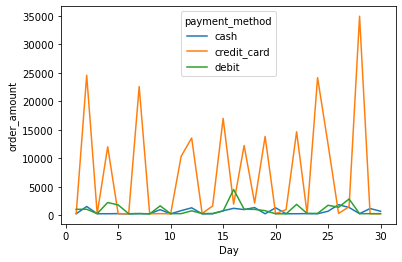

In [34]:
DFmethodavgitemamount=DF1.groupby(['payment_method','Day']).agg({'order_amount':'mean'}).reset_index()
sns.lineplot(DFmethodavgitemamount['Day'],DFmethodavgitemamount['order_amount'],hue=DFmethodavgitemamount['payment_method'])

Credit card generating substantial value compared to other methods